In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import uniform, norm, gamma, expon, poisson, binom, bernoulli

In [2]:
n = 100000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, scale=width, loc=start)

print(data_uniform)

[23.79309699 12.03645602 22.19458238 ... 29.21621501 29.03494907
 16.15563589]


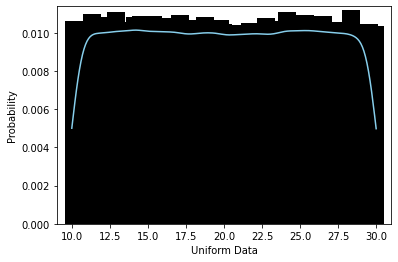

In [3]:
# sns.displot(
#     kind="hist", x=data_uniform, bins=100, kde=True, color="skyblue",
#     alpha=1, linewidth=8,
# )
sns.histplot(
    x=data_uniform, stat="probability", bins=100, kde=True, color="skyblue",
    alpha=1, linewidth=15
)
plt.xlabel("Uniform Data")
plt.ylabel("Probability")
plt.show()

[ 0.67413461  0.54616193 -0.56875966 ... -0.83698615  0.27915013
  0.64967757]


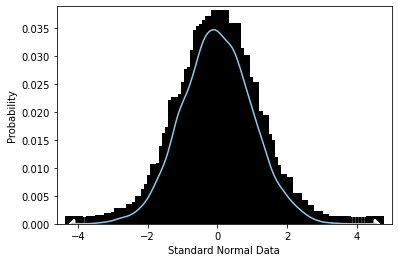

In [4]:
data_normal = norm.rvs(size=10000, loc=0, scale=1)
print(data_normal)

sns.histplot(
    x=data_normal, stat="probability", bins=100, kde=True, color="skyblue",
    alpha=1, linewidth=15
)
plt.xlabel("Standard Normal Data")
plt.ylabel("Probability")
plt.show()

[4.30540468 3.8973931  3.49357847 ... 4.60772962 5.63277546 3.3434819 ]


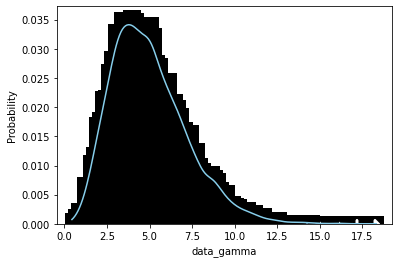

In [5]:
data_gamma = gamma.rvs(a=5, size=10000)
print(data_gamma)

sns.histplot(
    x=data_gamma, stat="probability", bins=100, kde=True, color="skyblue",
    alpha=1, linewidth=15
)
plt.xlabel("data_gamma")
plt.ylabel("Probability")
plt.show()

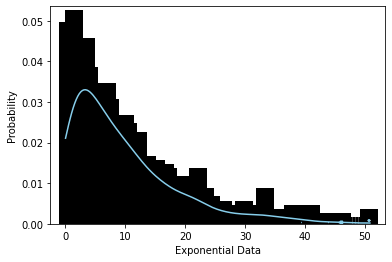

In [6]:
data_expon = expon.rvs(scale=10, loc=0, size=1000)

sns.histplot(
    x=data_expon, stat="probability", bins=100, kde=True, color="skyblue",
    alpha=1, linewidth=15
)
plt.xlabel("Exponential Data")
plt.ylabel("Probability")
plt.show()

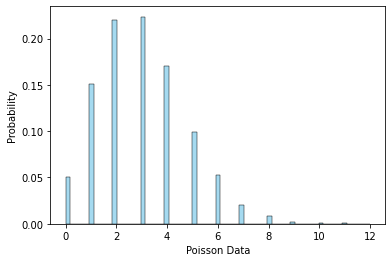

In [7]:
data_poisson = poisson.rvs(mu=3, size=10000)

sns.histplot(
    x=data_poisson, stat="probability", color="skyblue",
)
plt.xlabel("Poisson Data")
plt.ylabel("Probability")
plt.show()

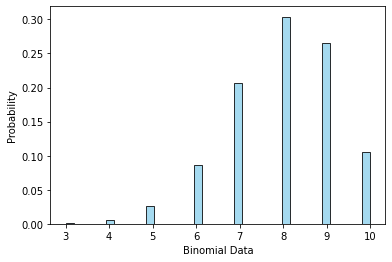

In [8]:
data_binom = binom.rvs(n=10, p=.8, size=10000)

sns.histplot(
    x=data_binom, stat="probability", color="skyblue",
)
plt.xlabel("Binomial Data")
plt.ylabel("Probability")
plt.show()

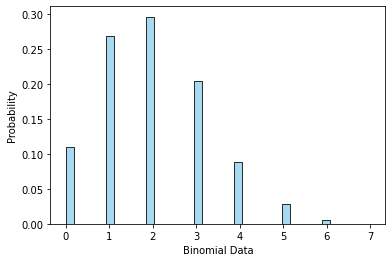

In [9]:
data_binom = binom.rvs(n=10, p=.2, size=10000)

sns.histplot(
    x=data_binom, stat="probability", color="skyblue",
)
plt.xlabel("Binomial Data")
plt.ylabel("Probability")
plt.show()

[0 0 0 ... 1 0 1]


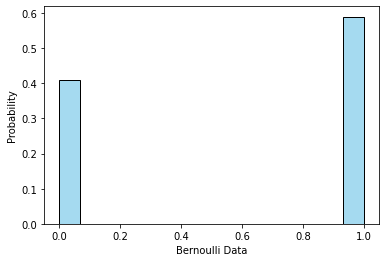

In [10]:
bernoulli_data = bernoulli.rvs(size=10000, p=.6)
print(bernoulli_data)

sns.histplot(
    x=bernoulli_data, stat="probability", color="skyblue",
)
plt.xlabel("Bernoulli Data")
plt.ylabel("Probability")
plt.show()

In [11]:
df = pd.read_csv("data/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
df["sex"] = df.sex.replace({0: "Female", 1: "Male"})
dx = df[["target", "sex"]].dropna()
dx

,target,sex
0,0,Male
1,0,Male
2,0,Male
3,0,Male
4,0,Female
...,...,...
1020,1,Male
1021,0,Male
1022,0,Male
1023,1,Female


In [13]:
pd.crosstab(dx.target, dx.sex)

sex,Female,Male
target,,
0,86,413
1,226,300


In [14]:
total_f = 86 + 226
prop_f = 226 / total_f
se_prop_f = np.sqrt(prop_f * (1 - prop_f) / total_f)
print("SE proportion for female:", se_prop_f)

SE proportion for female: 0.02529714756803247


In [15]:
z_score = 1.96
lower_ci_prop_f = prop_f - z_score*se_prop_f
upper_ci_prop_f = prop_f + z_score*se_prop_f

print("CI for proportion of female who has heart disease: [{}, {}]".format(
    lower_ci_prop_f, upper_ci_prop_f
))

CI for proportion of female who has heart disease: [0.6747765651256307, 0.773941383592318]


In [16]:
sm.stats.proportion_confint(total_f * prop_f, total_f)

(0.6747774762140357, 0.773940472503913)

In [17]:
df.groupby("sex").agg({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
sex                               
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [18]:
female_mean = 261.45
female_std = 64.4
se_mean_f = female_std / np.sqrt(total_f)
print(se_mean_f)

3.6459320499455985


In [19]:
lower_ci_mean_f = female_mean - z_score*se_mean_f
upper_ci_mean_f = female_mean + z_score*se_mean_f

print("CI for proportion of female who has heart disease: [{}, {}]".format(
    lower_ci_mean_f, upper_ci_mean_f
))

CI for proportion of female who has heart disease: [254.3039731821066, 268.59602681789335]


In [20]:
n = 1018
p_null = .52
p_alternate = .56

sm.stats.proportions_ztest(p_alternate * n, n, p_null, alternative="larger")

(2.571067795759113, 0.005069273865860533)